----------
<div class="alert alert-success">
    
# Комментарий от наставника

<br>
    
***Алексей***, привет!

Меня зовут ***Виноградов Андрей***, я проверил твой проект. 

Хочу отметить, что это, действительно, очень качественная работа, проверять такие работы - одно удовольствие. Видно, что ты постарался :)
   
Есть несколько комментариев, но ничего критичного.

Далее в файле мои комментарии ты сможешь найти в ячейках в формате markdown - они будут выделены цветом (<font color='crimson'>красный</font>/<font color='gold'>желтый</font>/<font color='limegreen'>зеленый</font>). 
- <font color='crimson'>Красный цвет</font> - критичное замечание;
- <font color='gold'>Желтый</font> - комментарий общего характера;
- <font color='limegreen'>Зеленый</font> - положительный коммент.


Пострайся учесть эти комментарии в ходе выполнения дальнейших проектов.
</div>

---------

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
    
Очень правильно, что ты в начале работы указываешь ***цель*** исследования.

Это позволяет читателю сразу понять для чего проводится анализ.
</div>

<div class="alert alert-warning">
Правда, также хорошим тоном было бы прилагать информацию о входных данных: какие столбцы есть в таблице и какую информацию они несут. <br>  

*Например,*
    
Описание данных:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- ...
</div>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
df=pd.read_csv('/datasets/real_estate_data.csv')
#Для начала изучим предложенный датасет методом .info()
print(df.info()) 

#Данные выгружаются в один столбец, разделитель "\" не делит по умолчанию на столбцы при выгрузке, непорядок.😒

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB
None


In [2]:
#Добавим разделитель "\" при чтении данных и применим метод .info() при выводе ещё раз, а также первые 5 строк таблицы.
df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(df.info())
print(df.head())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
#Изучим количественные данные int64 и float64
print(df.describe())


       total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445

In [4]:
#Изучим качественные данные object, bool
print(df['first_day_exposition'].value_counts())
print(df['is_apartment'].value_counts())
print(df['studio'].value_counts())
print(df['open_plan'].value_counts())
print(df['locality_name'].value_counts())



2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2018-04-14T00:00:00      1
2015-10-06T00:00:00      1
2015-02-24T00:00:00      1
2015-09-09T00:00:00      1
2014-12-17T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64
False    2725
True       50
Name: is_apartment, dtype: int64
False    23550
True       149
Name: studio, dtype: int64
False    23632
True        67
Name: open_plan, dtype: int64
Санкт-Петербург               15721
посёлок Мурино                  522
посёлок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
садовое товарищество Рахья        1
деревня Русско                    1
деревня Борисова Грива            1
деревня Большое Рейзино           1
деревня Нижние Осельки            1
Name: locality_name, Length: 364, dtype: int64


### Вывод

1. После проверки датасета методом .info() и выгрузкой первых 10 строк методом .head(10) стало понятно, что все данные выгрузились в 1 столбец, но столбцов должно быть больше. В датасете знак разделения наблюдается как "\t". После такой выгрузки, 22 столбца вместо одного, отлично!
2. Посмотрим на каждый столбец в отдельности и пометим нестыковки:

#### total_images - количество фотографий (23699 non-null int64)
- количество фотографий квартиры, тип данных корректен, пропущенных значений не наблюдается.

#### last_price              23699 non-null float64 
- цена на момент снятия публикации. Пропущенных значений не наблюдается. Но тип данных float имеет смысл заменить на int. Чтобы значения были до целых рублей.

total_area              23699 non-null float64 - при первом рассмотрении проблем не обнаружено.

first_day_exposition    23699 non-null object - пропусков не видно, но тип данных нужно заменить на datetime вместо object

rooms                   23699 non-null int64 - при первом рассмотрении проблем не обнаружено.

ceiling_height          14504 non-null float64 - тип данных корректен, но есть пропущенные значения (NaN)

floors_total            23613 non-null float64 - поскольку дробных значений этажей не существует, нужно заменить тип данных на int64

living_area             21796 non-null float64 - тип данных корректен, но имеются пропуски (NaN)

floor                   23699 non-null int64 - при первом рассмотрении проблем не обнаружено.

is_apartment            2775 non-null object - есть пропущенные значения и их очень много. При этом отсутствующие значения не значат, что это не апартаменты т.к. для этого есть запись False в данном столбце. 

studio                  23699 non-null bool - при первом рассмотрении проблем не обнаружено. Значения False или True.

open_plan               23699 non-null bool - при первом рассмотрении проблем не обнаружено. Значения False или True.

kitchen_area            21421 non-null float64 - тип данных корректен, но имеются пропуски (NaN).

balcony                 12180 non-null float64 - тип данных нужно поменять на int64, т.к. сомнительно, что могут встречаться дробные значения количества балконов. Имеются пропуски (NaN).

locality_name           23650 non-null object - не хватает 49 значений

airports_nearest        18157 non-null float64 - есть пропущенные значения, тип данных можно поменять на int64

cityCenters_nearest     18180 non-null float64 - есть пропущенные значения, тип данных можно поменять на int64

parks_around3000        18181 non-null float64 - есть пропущенные значения, тип данных НУЖНО поменять на int64, количество парков не должно быть дробным

parks_nearest           8079 non-null float64 - много пропущенных значений, тип данных нужно перевести на int64, дроби в метрах ни к чему

ponds_around3000        18181 non-null float64 - есть пропущенные значения, тип данных НУЖНО поменять на int64, количество прудов не должно быть дробным

ponds_nearest           9110 non-null float64 - много пропущенных значений, тип данных нужно перевести на int64, дроби в метрах ни к чему

days_exposition         20518 non-null float64 - есть пропущенные значения, тип данных следует поменять на Int64, до целых дней




<div class="alert alert-success">
    
Всё структурировано, по делу. Мы изучили данные и можно приступать к предобработке :)
</div>

### Шаг 2. Предобработка данных

### 2.1 Определение пропущенных значений

In [5]:
#посмотрим общее количество пропущенных значений в столбцах
print(df.isnull().sum())
#на всякий случай проверим данные на наличие дубликатов
print('Количество дубликатов: ',df.duplicated().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64
Количество дубликатов:  0


#### В 14 из 22 столбцов обнаружены пропущенные значения, дубликатов не обнаружено.

### 2.2 Заполнение пропущенных значений

#### Высота потолков (['ceiling_height'])  
Поскольку большинство значений высоту потолка 2,5-2,8м, а также присутствуют аномальные значения высоты - 1м, 100м. - имеет смысл заполнить пропуски медианным значением.Что и сделаем.

In [6]:
#Изучим пропущенные значения по столбцам
#ceiling_height - высота потолков
print(df['ceiling_height'].describe())
print(df['ceiling_height'].head(10))
#большинство значений - похожи на реальные, но есть выбросы. Поэтому заменим пропущенные значения на медиану.
df['ceiling_height']=df['ceiling_height'].fillna(df['ceiling_height'].median())
#проверим вывод
print('Пропущенных значений в высотах потолка:',df['ceiling_height'].isnull().sum())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
0    2.70
1     NaN
2     NaN
3     NaN
4    3.03
5     NaN
6     NaN
7     NaN
8     NaN
9    2.50
Name: ceiling_height, dtype: float64
Пропущенных значений в высотах потолка: 0


#### Всего этажей в доме (['floors_total'])  
Пропущенных значений очень мало, повторим предыдущий метод и выполним заполнение пропусков по медиане

In [7]:
#Выведем информацию о столбце
print(df['floors_total'].describe())
print(df['floors_total'].value_counts())
#Заменим пропуски на медиану (т.к. количество этажей брать из дробного среднего некорректно) и проверим вывод
df['floors_total']=df['floors_total'].fillna(df['floors_total'].median())
print('Пропущенных значений в количестве этажей:',df['floors_total'].isnull().sum())

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64
Пропущенных значений в количестве этажей: 0


#### Жилая площадь (['living_area'])  
Пропущенных значений не мало, но есть значения общей площади, где пропуски отсутствуют. Можно рассчитать среднее отношение между жилой площадью и общей площадью, это будет точнее нежели просто взять среднее или медиану для заполнения пропусков.

In [8]:
#Выведем информацию о столбце
print(df['living_area'].describe())
print(df['living_area'].value_counts())
#Поскольку у нас отсутствуют пропуски в общей площади, попробуем посчитать отношение жилой площади к общей и сохраним в переменной
area_coefficient=df['living_area'].median()/df['total_area'].median()
print(area_coefficient)
#теперь заполним пропущенные значения получившимся коэффициентом
df['living_area']=df['living_area'].fillna(df['total_area']*area_coefficient)
print('Количество пропущенных значений в жилой площади:',df['living_area'].isnull().sum())

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64
18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
20.03      1
10.55      1
24.83      1
20.97      1
15.55      1
Name: living_area, Length: 1782, dtype: int64
0.5769230769230769
Количество пропущенных значений в жилой площади: 0


<div class="alert alert-success">
    
Хорошая идея :)
</div>

#### is_apartment — апартаменты (булев тип)
Очень много пропущенных значений. Но корректно их заполнить невозможно, т.к. нет тех данных, по которым можно сделать вывод - апартаменты это или нет. Апартаменты могут быть и студиями, и находится где угодно, в общем ничем не отличаться от обычных квартир. Поскольку нет дополнительных вводных, поменяем пропущенные значения на False

In [9]:
print(df['is_apartment'].value_counts())
#Для удобства поменяем пропущенные значения на False
df['is_apartment'] = df['is_apartment'].fillna(0)
df['is_apartment']= df['is_apartment'].astype('bool')


False    2725
True       50
Name: is_apartment, dtype: int64


#### kitchen_area — площадь кухни в квадратных метрах (м²)
2278 пропущенных значений. Для заполнения пропусков можно рассчитать коэффициент отношения медианы средней общей площади и медианы площади кухни.

In [10]:
#Выведем информацию о столбце
print(df['kitchen_area'].describe())
print(df['kitchen_area'].value_counts())
#Поскольку у нас отсутствуют пропуски в общей площади, попробуем посчитать отношение площади кухни к общей и сохраним в переменной
kitchen_area_coefficient=df['kitchen_area'].median()/df['total_area'].median()
print(kitchen_area_coefficient)
#теперь заполним пропущенные значения получившимся коэффициентом
df['kitchen_area']=df['kitchen_area'].fillna(df['total_area']*kitchen_area_coefficient)
print('Количество пропущенных значений в площади кухни:',df['kitchen_area'].isnull().sum())

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64
6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
18.07       1
28.20       1
37.90       1
9.51        1
35.40       1
Name: kitchen_area, Length: 971, dtype: int64
0.175
Количество пропущенных значений в площади кухни: 0


#### balcony — число балконов
11519 пропущенных значений. 

Поскольку в задачах нет зависимости от кол-ва балконов - можно воспользоваться советом из описания задачи "Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0". 



In [11]:
#Выведем информацию о столбце
print(df['balcony'].describe())
print(df['balcony'].value_counts())
df['balcony']=df['balcony'].fillna(0)
print('Пропущенных значений в количестве балконов:',df['balcony'].isnull().sum())



count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64
1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64
Пропущенных значений в количестве балконов: 0


#### locality_name

49 пропущенных значений 

364 уникальных значений

Поскольку количество пропусков в данном случае очень маленькое, и делать сравнение по близости аэропорта, центра города, где также имеются пропущенные значения в нужных строках - имеет смысл удалить эти пропуски.


In [12]:
#Выведем информацию о столбце
#print(df['locality_name'].describe())
print(df['locality_name'].value_counts())

#замечены разные написания слова посёлок, через "Е" и "Ё", поправим заменой.
df['locality_name'].str.replace('ё','е')

df.query('locality_name.isnull()')
#Удалим пропуски
df.dropna(subset=['locality_name'], inplace = True)
print('Пропущенных значений в називаниях населённых пунктов:',df['locality_name'].isnull().sum())

Санкт-Петербург               15721
посёлок Мурино                  522
посёлок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
садовое товарищество Рахья        1
деревня Русско                    1
деревня Борисова Грива            1
деревня Большое Рейзино           1
деревня Нижние Осельки            1
Name: locality_name, Length: 364, dtype: int64
Пропущенных значений в називаниях населённых пунктов: 0


#### airports_nearest 

5542 пропущенных значений 

Средния значения или медиана по столбцу не даст нам нужных данных для нахождения корректных значений для заполнения пропусков. Думаю будет адекватно в данном случае выяснить для начала, среднюю отдалённость от аэропорта от каждого населённого пункта, а полученное значение передать в соответствующие пропуски. Но это 364 значения, а учитывая, что в задачах этот критерий не самый важный, значения оставлю пустыми. 



In [13]:
#Выведем информацию о столбце
print(df['airports_nearest'].describe())
print(df['airports_nearest'].value_counts())
#Заполним пропуски в расстоянии до аэропорта медианой
df['airports_nearest']=df['airports_nearest'].fillna(df['airports_nearest'].median())
print(df['airports_nearest'].isnull().sum())

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64
37434.0    61
21928.0    32
44870.0    30
39946.0    30
18732.0    27
           ..
8099.0      1
35587.0     1
50198.0     1
40942.0     1
19470.0     1
Name: airports_nearest, Length: 8257, dtype: int64
0


<div class="alert alert-warning">
    
Не совсем разобрался — пишешь, что оставим пропуски пустыми и заменяешь их медианой :)
</div>

#### cityCenters_nearest - расстояние до центра города (м)







In [14]:
#Выведем информацию о столбце
print(df['cityCenters_nearest'].describe())
print(df['cityCenters_nearest'].head())
#посмотрим среднее растояние до аэропорта с разбивкой по населённым пунктам
cityC_nearest_pivot=df.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc='mean')
print(cityC_nearest_pivot.head(10))
#Чтобы более менее корректно заполнить пропуски, сохранием средние для СПБ в соответствую переменную.
#Для начала сделаем срез по данным из СПБ т.к. большинство квартир именно там
spb_cityC_nearest=df.query('locality_name == "Санкт-Петербург"')
print(spb_cityC_nearest['locality_name'].value_counts())
#И высчитаем среднее значение расстояния до центра
spb_cityC_nearest_mean=spb_cityC_nearest['cityCenters_nearest'].mean()
print('Среднее расстояние до центра в СПБ',spb_cityC_nearest_mean)
print(spb_cityC_nearest_mean)
#Затем удалим значения СПБ для расчётов и также выделим среднее значение
other_cityC_nearest=df.query('locality_name != "Санкт-Петербург"')
print(other_cityC_nearest['locality_name'].value_counts())
other_cityC_nearest_mean=other_cityC_nearest['cityCenters_nearest'].mean()
print('Среднее расстояние до центра в ближайших поселениях', other_cityC_nearest_mean)
#посмотрим количество пропусков в срезе по СПБ и в срезе по другим нас. пунктам
print(spb_cityC_nearest['cityCenters_nearest'].isnull().sum())
print(other_cityC_nearest['cityCenters_nearest'].isnull().sum())
#В Петербурге всего 64 пропущенных значения, учитывая, что всего квартир выставлено 15721 (Это 0,004%), 
#можно смело заполнять пропуски по среднему значению для других нас. пунктов
df['cityCenters_nearest']=df['cityCenters_nearest'].fillna(other_cityC_nearest_mean)
print(df['cityCenters_nearest'].isnull().sum())

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64
0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
Name: cityCenters_nearest, dtype: float64
                 cityCenters_nearest
locality_name                       
Зеленогорск             54617.583333
Колпино                 32113.771513
Красное Село            30020.284091
Кронштадт               49195.726316
Ломоносов               50739.969697
Павловск                33206.921053
Петергоф                35468.925373
Пушкин                  28745.375000
Санкт-Петербург         11601.291571
Сестрорецк              34624.480874
Санкт-Петербург    15721
Name: locality_name, dtype: int64
Среднее расстояние до центра в СПБ 11601.291570881225
11601.291570881225
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин            

#### parks_around3000 , parks_nearest, ponds_around3000, ponds_nearest






In [15]:
print(df['parks_around3000'].describe())
print(df['parks_nearest'].describe())
print(df['parks_around3000'].value_counts())
print(df['parks_around3000'].isnull().sum())
print(df['parks_nearest'].isnull().sum())
#Из данных видно, что большая часть квартир не имеют парков в радиусе 3-х километров.

count    18140.000000
mean         0.611577
std          0.802003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64
count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64
0.0    10080
1.0     5671
2.0     1744
3.0      645
Name: parks_around3000, dtype: int64
5510
15586


In [16]:
#А что если сложить пропущенные значения в parks_around3000 и прибавить нулевые значения в нём же?
parks_without=df['parks_around3000'].isnull().sum()
parks_is_nan=df.query('parks_around3000=="0.000000"').count()
parks_empty=parks_without+parks_is_nan
print(parks_empty['parks_around3000'].sum())
#Цифра примерно равна отсутствующим значениям в расстоянии до парков, из чего можно сделать вывод, 
#что и там и там, парков рядом нет

15590


In [17]:
#Попробуем заполнить пропуски в parks_around3000 на нулевое значение
df['parks_around3000']=df['parks_around3000'].fillna(0.000000)
print('Пропуски в количестве парков:',df['parks_around3000'].isnull().sum())
#Пропуски в расстоянии заполним на значение 'Нет', т.к. заполнять на '0'не корректно, получим много выбросов на этой отметке
df['parks_nearest']=df['parks_nearest'].fillna('Нет')
print('Пропуски в расстоянии до парков:',df['parks_nearest'].isnull().sum())

Пропуски в количестве парков: 0
Пропуски в расстоянии до парков: 0


In [18]:
#посмотрим на данные
print(df['ponds_around3000'].describe())
print(df['ponds_nearest'].describe())
print(df['ponds_around3000'].value_counts())
print(df['ponds_around3000'].isnull().sum())
print(df['ponds_nearest'].isnull().sum())

count    18140.000000
mean         0.769680
std          0.937948
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64
count    9085.000000
mean      518.059879
std       277.841733
min        13.000000
25%       293.000000
50%       502.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64
0.0    9055
1.0    5702
2.0    1889
3.0    1494
Name: ponds_around3000, dtype: int64
5510
14565


In [19]:
#Попробуем предыдущий принцип вычислений для парков применить на пруды
ponds_without=df['ponds_around3000'].isnull().sum()
ponds_is_nan=df.query('ponds_around3000=="0.000000"').count()
ponds_empty=ponds_without+ponds_is_nan
print(ponds_empty['ponds_around3000'].sum())

14565


In [20]:
#В этот раз значение полностью совпало с суммой пропущенных значений в расстоянии до пруда (ponds_nearest)
df['ponds_around3000']=df['ponds_around3000'].fillna(0.000000)
print('Пропуски в количестве прудов:',df['ponds_around3000'].isnull().sum())
#Пропуски в расстоянии заполнять не будем, т.к. заполнять на '0'не корректно, получим много выбросов на этой отметке. 
df['ponds_nearest']=df['ponds_nearest'].fillna('Нет')
print('Пропуски в расстоянии до прудов:',df['ponds_around3000'].isnull().sum())

Пропуски в количестве прудов: 0
Пропуски в расстоянии до прудов: 0


#### days_exposition






count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64
45.0      879
60.0      538
7.0       234
30.0      208
90.0      203
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64
3180


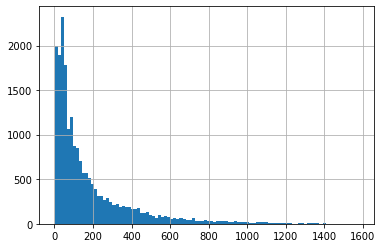

In [21]:
#Изучим столбец с данными
print(df['days_exposition'].describe())
print(df['days_exposition'].value_counts())
print(df['days_exposition'].isnull().sum())
df['days_exposition'].hist(bins=100)

In [22]:
#В данном случае есть очень высокие значения, и очень низкие. В данном случае думаю будет корректно заполнить пропуски медианой.
df['days_exposition']=df['days_exposition'].fillna(df['days_exposition'].mean())
print('Пропусков в количестве дней размещения объявления:',df['days_exposition'].isnull().sum())

Пропусков в количестве дней размещения объявления: 0


### Вывод

#### В датафрейме много пропусков, больше половины. Некоторые из них получилось заполнить, а вот другие, такие как например is_apartment невозможно корректно заполнить ввиду отсутствия дополнительных данных. Как вариант, запросить наименование ЖК, т.к. как правило апартаменты не бывают в обычном жилом доме, это отдельный ЖК с таким типом квартир.

<div class="alert alert-success">
    
Аргументированный хороший **вывод** :)
</div>

### 2.3 Замена типов данных


In [23]:
#Выведем ещё раз информацию о дата фрейме.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        23650 non-null float64
parks_nearest           23650 non-null object
ponds_around3000

In [24]:
#Для начала заменим тип данных с Float64 на Int64 где необходимо
df['last_price']=df['last_price'].astype('int')
df['floors_total']=df['floors_total'].astype('int')
df['balcony']=df['balcony'].astype('int')
df['airports_nearest']=df['airports_nearest'].astype('int')
df['cityCenters_nearest']=df['cityCenters_nearest'].astype('int')
#df.loc[df['parks_nearest'].notna(), 'parks_nearest'] = df.loc[df['parks_nearest'].notna(),'parks_nearest'].astype('int64')
df['parks_around3000']=df['parks_around3000'].astype('int')
#df.loc[df['ponds_nearest'].notna(), 'ponds_nearest'] = df.loc[df['ponds_nearest'].notna(),'ponds_nearest'].astype('int64')
df['ponds_around3000']=df['ponds_around3000'].astype('int')
df['days_exposition']=df['days_exposition'].astype('int')
#Затем заменим тип данных в столбце с датой первой публикации
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')
#теперь проверим изменения
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null int64
cityCenters_nearest     23650 non-null int64
parks_around3000        23650 non-null int64
parks_nearest           23650 non-null object
ponds_around3000    

### Вывод

Предварительная обработка сделана, пропуски заполнены, типы данных изменены.

<div class="alert alert-success">
    
Типы данных изменены корректно.
</div>

### Шаг 3. Посчитайте и добавьте в таблицу

In [25]:
#Посчитаем цену квадратного метра
df['square_meter_price']=df['last_price']/df['total_area']
#поменяем тип данных в столбце с ценой квадратного метра на int
df['square_meter_price']=df['square_meter_price'].astype('int')
print(df['square_meter_price'].head())

0    120370
1     82920
2     92785
3    408176
4    100000
Name: square_meter_price, dtype: int64


In [26]:
#сделаем столбец с днём недели публикации объявления
df['exposition_day']=df['first_day_exposition'].dt.day_name()
print(df['exposition_day'].head())

0    Thursday
1     Tuesday
2    Thursday
3      Friday
4     Tuesday
Name: exposition_day, dtype: object


In [27]:
#сделаем столбец с месяцем публикации объявления
df['exposition_month']=df['first_day_exposition'].dt.month_name()
print(df['exposition_month'].head())

0       March
1    December
2      August
3        July
4        June
Name: exposition_month, dtype: object


In [28]:
#сделаем столбец с годом публикации объявления
df['exposition_year']=pd.DatetimeIndex(df['first_day_exposition']).year
print(df['exposition_year'].head())

0    2019
1    2018
2    2015
3    2015
4    2018
Name: exposition_year, dtype: int64


In [29]:
#Распределим этажи на первый, последний и другой
def floor_group(floor):
        if floor['floor'] == 1:
            return 'первый'
        elif floor['floor'] == floor['floors_total']:
            return 'последний'
        else:
            return 'другой'
df['floor_group'] = df.apply(floor_group, axis=1)
print(df['floor_group'].value_counts())

другой       17403
последний     3335
первый        2912
Name: floor_group, dtype: int64


In [30]:
#посчитаем соотношение жилой и общей площади
df['living_to_total']=df['living_area']/df['total_area']
print(df['living_to_total'].head())

0    0.472222
1    0.460396
2    0.612500
3    0.576923
4    0.320000
Name: living_to_total, dtype: float64


In [31]:
#посчитаем отношение площади кухни к общей
df['kitchen_to_total']=df['kitchen_area']/df['total_area']
print(df['kitchen_to_total'].head())

0    0.231481
1    0.272277
2    0.148214
3    0.175000
4    0.410000
Name: kitchen_to_total, dtype: float64


<div class="alert alert-success">
    
На данном этапе верно посчитаны и добавлены важные метрики :)
</div>

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


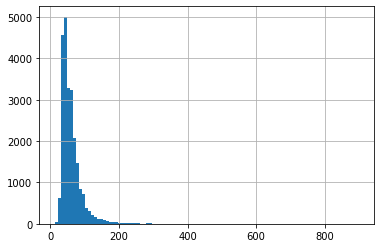

In [32]:
#Изучим площадь квартир
print(df['total_area'].describe())
df['total_area'].hist(bins=100)
#Большинство квартир имеют площадь около 50кв.м. (медиана), но есть и очень высокие значения, но их немного

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64
12190
763000000


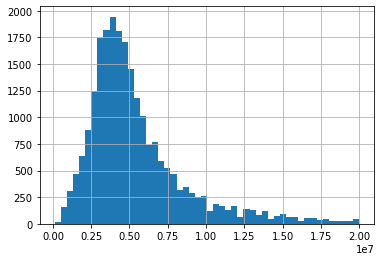

In [33]:
#Изучим цены на квартиры

print(df['last_price'].describe())
print(df['last_price'].min())
print(df['last_price'].max())
#df['last_price'].hist(bins=10, range=(70000000, 763000000))
#Есть аномально высокие значения, попробуем ограничить гистограмму, чтобы было нагляднее
df['last_price'].hist(bins=50, range=(121900, 20000000))
#Получается, что большинство квартир продаются в диапазоне примерно от 4 до 5млн.
#df['last_price'].hist()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


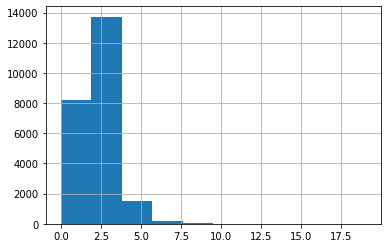

In [34]:
#Изучим количество комнат
print(df['rooms'].describe())
df['rooms'].hist(bins=10)
#Большинство квартир имеют 2-3 комнаты

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


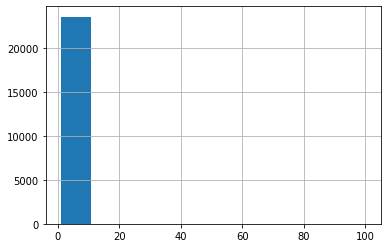

In [35]:
#Изучим высоту потолков
import matplotlib as plt
print(df['ceiling_height'].describe())
df['ceiling_height'].hist()
#Ввиду наличия аномально высоких значений, гистограмма не показательна

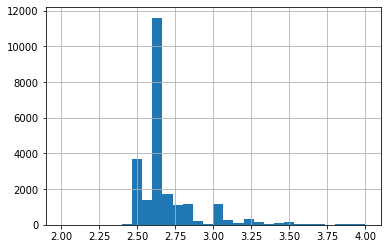

In [36]:
#Попробуем задать максимальную высоту в 4м и минимальную в 2м
df['ceiling_height'].hist(bins=30, range=(2,4))
#Видно, что большинство значений примерно на значении 2,6м

#### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

count    23650.000000
mean       180.651924
std        204.468455
min          1.000000
25%         45.000000
50%        124.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64
180.65192389006342 124.0


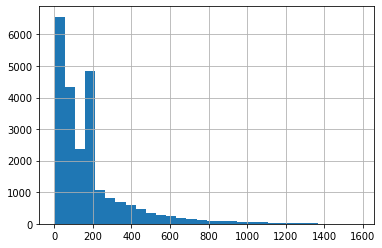

In [37]:
df['days_exposition'].hist(bins=30)
print(df['days_exposition'].describe())

days_exposition_mean=df['days_exposition'].mean().sum()
days_exposition_median=df['days_exposition'].median().sum()
print(days_exposition_mean, days_exposition_median)
#По графику и описанию видно,что продажа обычно занимает от 0 до 200 дней.


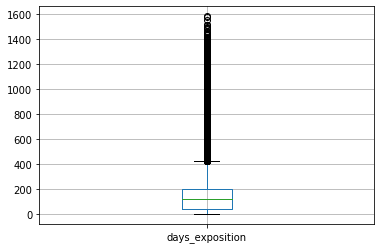

In [38]:
df.boxplot(column='days_exposition')


#### Судя по гистограмам и графику с усами видно, что большинство квартир продаётся за 45-200 дней. Можно считать, что продажи квартир, совершённые в первые 45 дней - это очень быстрые продажи, в то время как продажи, совершённые от 200 дней и выше - долгие.

<div class="alert alert-success">
    
Все правильно.
</div>

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
1%          25.174500
50%         52.000000
75%         69.700000
80%         74.900000
85%         81.800000
90%         93.500000
95%        116.000000
96%        125.000000
97%        139.500000
98%        159.000000
99%        197.557000
max        900.000000
Name: total_area, dtype: float64

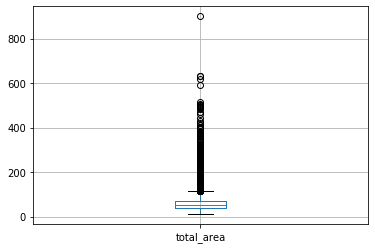

In [39]:
#Посмотрим редкие и выбивающиеся значения по разным столбцам
#total_area - общая площадь
df.boxplot(column='total_area')
perc =[.01,.75, .80, .85, .90, .95, .96, .97, .98, .99]
df['total_area'].describe(percentiles=perc) 
#Минимальное значение 12кв.м., такое значение может быть, а вот значения в 900кв.м.

count        23650.00
mean       6541126.90
std       10896399.18
min          12190.00
1%         1000000.00
50%        4650000.00
75%        6799000.00
80%        7580000.00
85%        8800000.00
90%       10900000.00
95%       15300000.00
96%       17000000.00
97%       20000000.00
98%       25000000.00
99%       36000000.00
max      763000000.00
Name: last_price, dtype: object

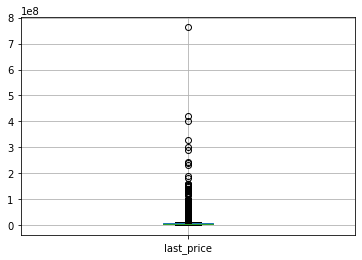

In [40]:
#last_price - последняя цена
df.boxplot(column='last_price')
perc =[.01,.75, .80, .85, .90, .95, .96, .97, .98, .99]
df['last_price'].describe(percentiles=perc).apply("{0:.2f}".format)
#есть аномальные значения на 1% и 99%, для чистоты эксперимента, можно удалить значения более 36млн и менее 1млн, поскольку их суммарно не более 2%



count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
1%           1.000000
50%          2.000000
75%          3.000000
80%          3.000000
85%          3.000000
90%          3.000000
95%          4.000000
96%          4.000000
97%          4.000000
98%          5.000000
99%          5.000000
max         19.000000
Name: rooms, dtype: float64

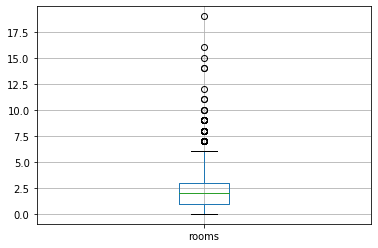

In [41]:
#rooms - количество комнат
df.boxplot(column='rooms')
perc =[.01,.75, .80, .85, .90, .95, .96, .97, .98, .99]
df['rooms'].describe(percentiles=perc)
#Отклонения замечены после 99%, а также перед 1%

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
1%           2.500000
50%          2.650000
75%          2.700000
80%          2.750000
85%          2.800000
90%          3.000000
95%          3.130000
96%          3.200000
97%          3.300000
98%          3.400000
99%          3.600000
max        100.000000
Name: ceiling_height, dtype: float64

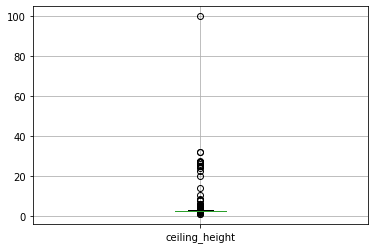

In [42]:
#ceiling_height - высота потолков
df.boxplot(column='ceiling_height')
perc =[.01,.75, .80, .85, .90, .95, .96, .97, .98, .99]
df['ceiling_height'].describe(percentiles=perc)
#Отклонения замечены после 99%, а также перед 1%

count    23650.000000
mean        34.612450
std         22.386704
min          2.000000
1%          13.000000
50%         30.000000
75%         42.115385
80%         45.000000
85%         49.000000
90%         55.000000
95%         69.555000
96%         75.000000
97%         82.400000
98%         95.000000
99%        122.000000
max        409.700000
Name: living_area, dtype: float64

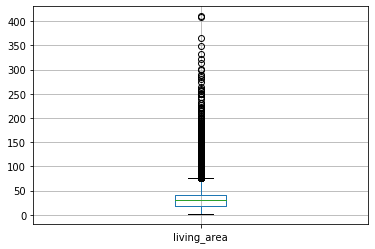

In [43]:
#living_area - жилая площадь
df.boxplot(column='living_area')
perc =[.01,.75, .80, .85, .90, .95, .96, .97, .98, .99]
df['living_area'].describe(percentiles=perc)
#Отклонения замечены после 99%, а также перед 1%

count    23650.000000
mean        10.502082
std          6.036839
min          1.300000
1%           4.375000
50%          9.000000
75%         12.000000
80%         12.800000
85%         14.000000
90%         15.900000
95%         20.000000
96%         22.000000
97%         24.300000
98%         28.100450
99%         35.551000
max        112.000000
Name: kitchen_area, dtype: float64

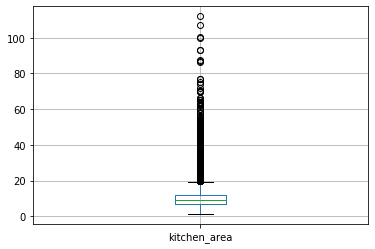

In [44]:
#kitchen_area - площадь кухни
df.boxplot(column='kitchen_area')
perc =[.01,.75, .80, .85, .90, .95, .96, .97, .98, .99]
df['kitchen_area'].describe(percentiles=perc)
#Аномальные отклонения замечены после 99%, а также перед 1%

count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
1%           1.000000
50%          4.000000
75%          8.000000
80%          9.000000
85%         11.000000
90%         13.000000
95%         16.000000
96%         17.000000
97%         19.000000
98%         21.000000
99%         23.000000
max         33.000000
Name: floor, dtype: float64

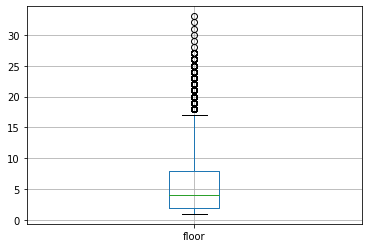

In [45]:
#floor - этаж
df.boxplot(column='floor')
perc =[.01,.75, .80, .85, .90, .95, .96, .97, .98, .99]
df['floor'].describe(percentiles=perc)
#Выбросы вовсе и не выбросы, в СПБ есть высокие дома 

count    23650.000000
mean         0.591712
std          0.959662
min          0.000000
1%           0.000000
50%          0.000000
75%          1.000000
80%          1.000000
85%          2.000000
90%          2.000000
95%          2.000000
96%          2.000000
97%          2.000000
98%          4.000000
99%          5.000000
max          5.000000
Name: balcony, dtype: float64

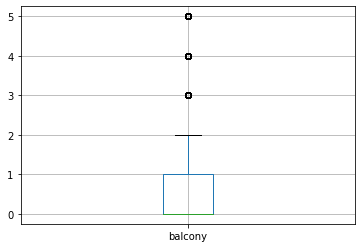

In [46]:
#balcony - количество балконов
df.boxplot(column='balcony')

perc =[.01,.75, .80, .85, .90, .95, .96, .97, .98, .99]
df['balcony'].describe(percentiles=perc)
#В половине случаев балкона нет :-(, есть значения в 4 и 5 балконов после 97%. Стоит ли ими жертвовать?


count    23650.000000
mean     18019.940634
std      10242.023053
min        181.000000
1%        1631.920000
50%      14996.000000
75%      30600.000000
80%      30600.000000
85%      30600.000000
90%      30600.000000
95%      30600.000000
96%      31388.000000
97%      32858.710000
98%      34425.000000
99%      48395.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

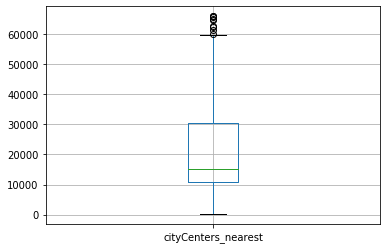

In [47]:
#cityCenters_nearest - расстояние до центра СПБ
df.boxplot(column='cityCenters_nearest')
perc =[.01,.75, .80, .85, .90, .95, .96, .97, .98, .99]
df['cityCenters_nearest'].describe(percentiles=perc)
#Есть значения 0 до 1%, врядли люди живут в самом аэропорте

count    23650.000000
mean     28324.183679
std      11094.226514
min          0.000000
1%        9731.000000
50%      26756.000000
75%      34358.000000
80%      36784.000000
85%      40114.650000
90%      44754.000000
95%      50183.750000
96%      51249.840000
97%      52212.000000
98%      53561.000000
99%      57025.000000
max      84869.000000
Name: airports_nearest, dtype: float64

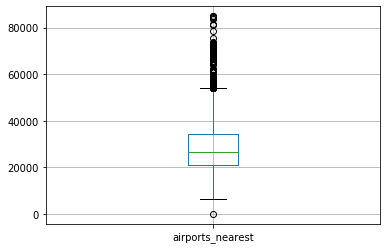

In [48]:
#airports_nearest - расстояние до аэропорту
df.boxplot(column='airports_nearest')
perc =[.01,.75, .80, .85, .90, .95, .96, .97, .98, .99]
df['airports_nearest'].describe(percentiles=perc)
#Есть значения 0 до 1%, врядли люди живут в самом аэропорте

count    23650.000000
mean     28324.183679
std      11094.226514
min          0.000000
1%        9731.000000
50%      26756.000000
75%      34358.000000
80%      36784.000000
85%      40114.650000
90%      44754.000000
95%      50183.750000
96%      51249.840000
97%      52212.000000
98%      53561.000000
99%      57025.000000
max      84869.000000
Name: airports_nearest, dtype: float64

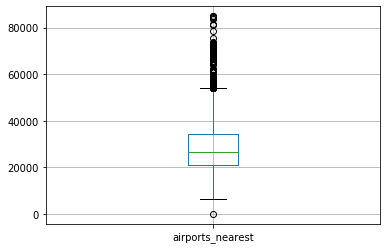

In [49]:
#airports_nearest - расстояние до аэропорту
df.boxplot(column='airports_nearest')
perc =[.01,.75, .80, .85, .90, .95, .96, .97, .98, .99]
df['airports_nearest'].describe(percentiles=perc)
#Есть значения 0 до 1%, врядли люди живут в самом аэропорте



In [1]:
#Чтобы получить более точные данные, отсечём ненужное циклом на основе диаграммы размаха
for column in ['ceiling_height','total_area', 'living_area', 'kitchen_area', 'cityCenters_nearest', 'rooms', 'balcony']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_border = Q1-1.5*IQR
    max_border = Q3+1.5*IQR
    df.drop(df[(df[column] < min_border) | (df[column] > max_border)].index, inplace=True)


NameError: name 'df' is not defined

<div class="alert alert-success">
    
Избавились от выбросов. Отлично!
</div>

#### Факторы, которые больше всего влияют на стоимость квартиры. Рассмотрим следующие зависимости:
* зависимость цены от квадратного метра
* зависимость цены числа комнат
* зависимость цены удалённости от центра
* зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом
* зависимость от даты размещения: дня недели, месяца и года.

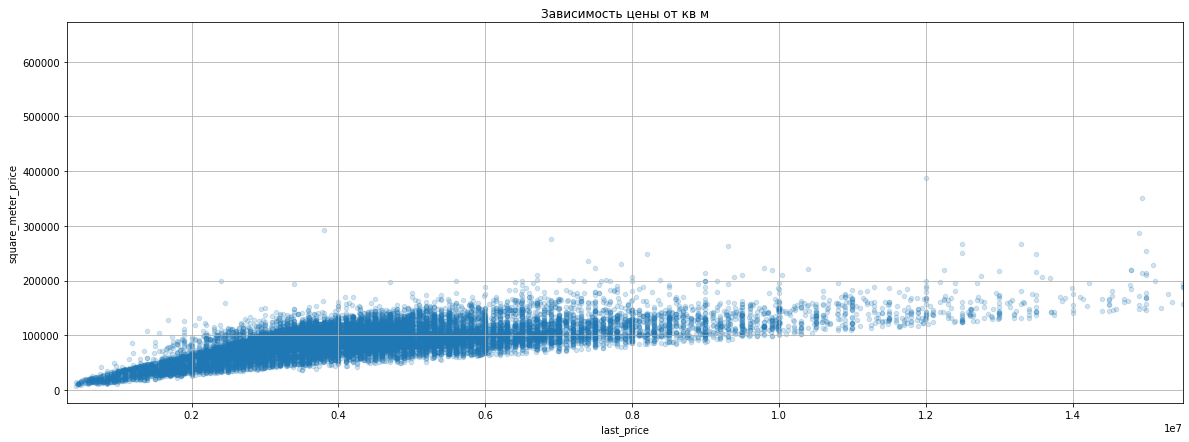

In [51]:
df.plot(
    x='last_price', y='square_meter_price',
    title='Зависимость цены от кв м',kind='scatter',
    style='o', alpha=.20, grid=True, figsize=(20,7)
    ,xlim=(300000,15500000)
)

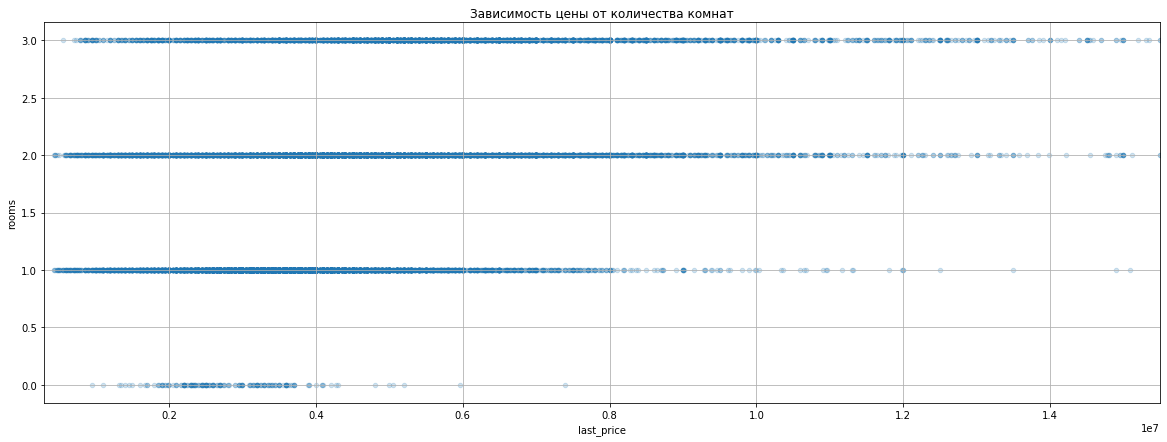

In [52]:
#Посмотрим на соотношение количества комнат и цены квартиры
df.plot(
    x='last_price', y='rooms',
    title='Зависимость цены от количества комнат',kind='scatter',
    style='*', alpha=.2, grid=True, figsize=(20,7), 
    xlim=(300000,15500000)
)
#Достаточно ожидаемо, что студии с 0 комнат самые дешёвые. Однокомнатные также дешевле 2-х и 3-х комнатных квартир. 
#А вот разница в стоимости между 2-х и 3-х комнатными квартирами не столь очевидна, скорее всего это зависит от площади


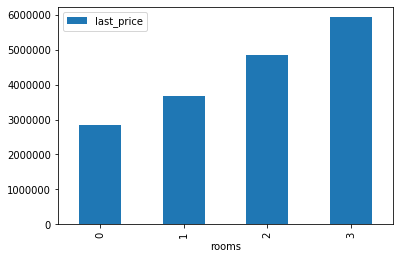

In [53]:
#Проверим с помощью сводной таблицы и ещё одного графика
rooms_pivot=df.pivot_table(index='rooms', values='last_price', aggfunc='mean')
rooms_pivot.head()
rooms_pivot.plot(y='last_price', kind='bar')
#Вывод, сделанный по предыдущему графику частично подтвердился, трёхкомнатные квартиры в среднем дороже всех остальных
#Вывод - есть прямая зависимость между стоимостью квартиры и количеством комнат

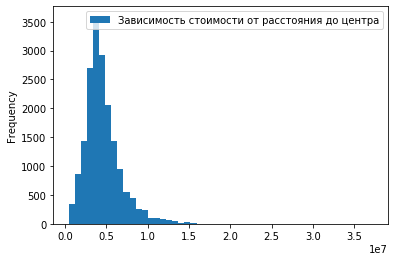

In [54]:
#Посмотрим зависимость цены удалённости от центра
df.plot (kind ='hist',bins=50,x='cityCenters_nearest', y='last_price', style='o', label='Зависимость стоимости от расстояния до центра',)


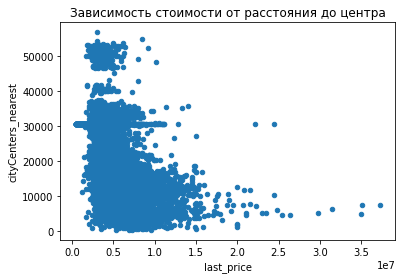

In [55]:
df.plot(
    x='last_price', y='cityCenters_nearest',
    title='Зависимость стоимости от расстояния до центра',kind='scatter'
    )
#В общем зависимость прослеживается, чем ближе к центру, тем дороже квартиры

In [56]:
#Посмотрим зависимость цены удалённости от центра
print(df['cityCenters_nearest'].corr(df['last_price']))

-0.4915098333312963


3    13576
2     2402
1     2268
Name: floor_group_num, dtype: int64


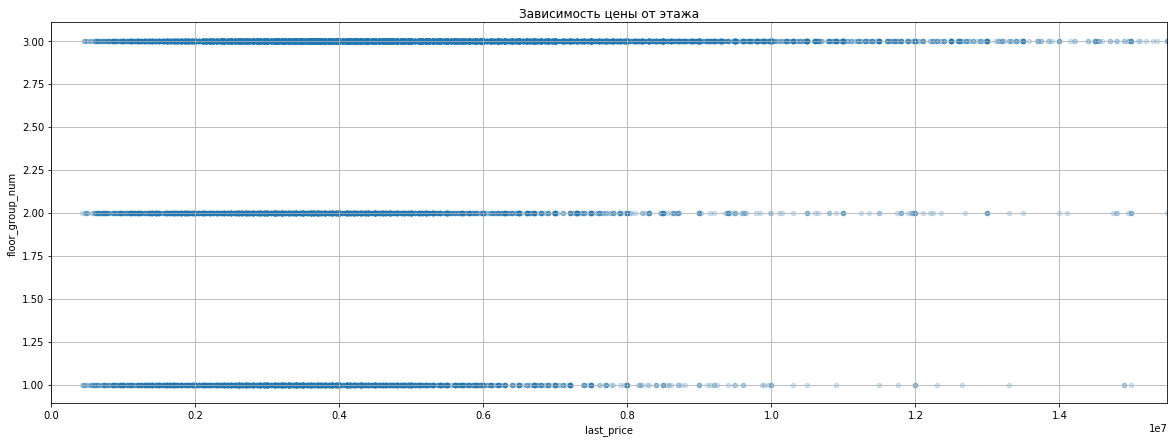

In [57]:
#Для удобства построения графика создадим новый столбец с числовыми обозначениями "Первый", "Последний" и "Другой".
def floor_group_num(floor):
        if floor['floor_group'] == 'первый':
            return 1
        elif floor['floor_group'] == 'последний':
            return 2
        else:
            return 3
df['floor_group_num'] = df.apply(floor_group_num, axis=1)
print(df['floor_group_num'].value_counts())
#Построим график зависимости цены от этажа, чтобы увидеть значения
df.plot(
    x='last_price', y='floor_group_num',
    title='Зависимость цены от этажа',kind='scatter',
    style='-o', alpha=.20, grid=True, figsize=(20,7)
    ,xlim=(0,15500000)
)
#Глядя на график можно сделать вывод, что наименьшая цена за квадратный метр для квартир на первом этаже, квартиры 
#на последнем этаже оцениваются выше, чем квартиры на первом. А квартиры на других этажах чаще встречаются в высоком ценовом диапазоне.

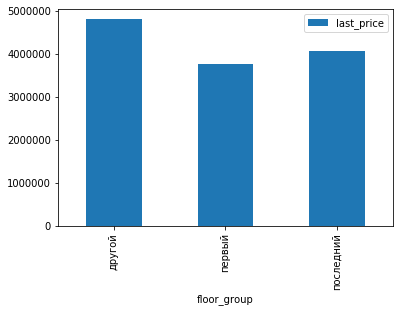

In [58]:
#Проверим с помощью сводной таблицы и ещё одного графика
floor_group_pivot=df.pivot_table(index='floor_group', values='last_price', aggfunc='mean')
floor_group_pivot.head()
floor_group_pivot.plot(y='last_price', kind='bar')
#Вывод, сделанный по предыдущему графику подтвердился

4    3253
2    3207
5    3112
3    3071
1    2742
6    1518
7    1343
Name: exposition_day_num, dtype: int64


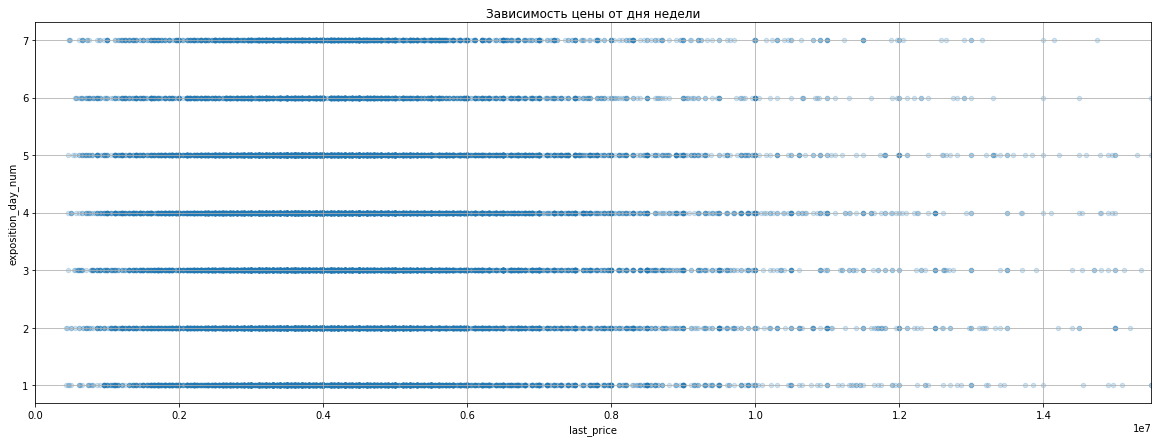

In [59]:
#Для удобства построения графика зададим числовые значения для дней недели
def exposition_day_num(day):
        if day['exposition_day'] == 'Monday':
            return 1
        elif day['exposition_day'] == 'Tuesday':
            return 2
        elif day['exposition_day'] == 'Wednesday':
            return 3
        elif day['exposition_day'] == 'Thursday':
            return 4
        elif day['exposition_day'] == 'Friday':
            return 5
        elif day['exposition_day'] == 'Saturday':
            return 6
        else:
            return 7

df['exposition_day_num'] = df.apply(exposition_day_num, axis=1)
print(df['exposition_day_num'].value_counts())
#Построим график зависимости цены от дня недели, чтобы увидеть значения
df.plot(
    x='last_price', y='exposition_day_num',
    title='Зависимость цены от дня недели',kind='scatter',
    style='-o', alpha=.20, grid=True, figsize=(20,7)
    ,xlim=(0,15500000)
)


#Не очень наглядно

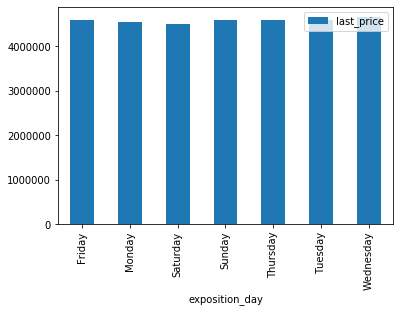

In [60]:
exp_day_pivot=df.pivot_table(index='exposition_day', values='last_price', aggfunc='mean')
exp_day_pivot.head()
exp_day_pivot.plot(y='last_price', kind='bar')
#Особой зависимости от дня размещения объявления нет, только по будням люди чаще размещают квартиры, нежели чем по выходным

<div class="alert alert-success">
    
Хорошо, что перевел номер дня недели в названия дня недели. Так намного удобнее :)

</div>

2     2031
3     2021
4     1830
11    1811
10    1660
9     1521
6     1393
8     1353
7     1276
12    1242
1     1139
5      969
Name: exposition_month_num, dtype: int64


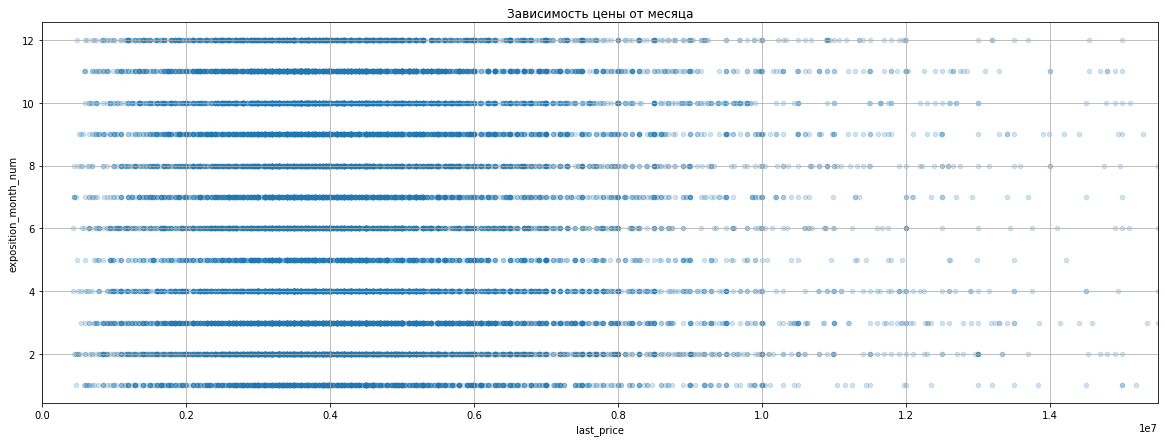

In [61]:
#Для удобства построения графика зададим числовые значения для дней недели
def exposition_month_num(month):
        if  month['exposition_month'] == 'January':
            return 1
        elif month['exposition_month'] == 'February':
            return 2
        elif month['exposition_month'] == 'March':
            return 3
        elif month['exposition_month'] == 'April':
            return 4         
        elif month['exposition_month'] == 'May':
            return 5
        elif month['exposition_month'] == 'June':
            return 6
        elif month['exposition_month'] == 'July':
            return 7
        elif month['exposition_month'] == 'August':
            return 8
        elif month['exposition_month'] == 'September':
            return 9
        elif month['exposition_month'] == 'October':
            return 10
        elif month['exposition_month'] == 'November':
            return 11        
        else:
            return 12

df['exposition_month_num'] = df.apply(exposition_month_num, axis=1)
print(df['exposition_month_num'].value_counts())
#Построим график зависимости цены от дня недели, чтобы увидеть значения
df.plot(
    x='last_price', y='exposition_month_num',
    title='Зависимость цены от месяца',kind='scatter',
    style='-o', alpha=.20, grid=True, figsize=(20,7)
    ,xlim=(0,15500000)
)
#Ничего не ясно :(



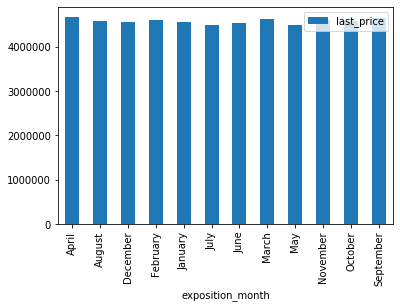

In [62]:
#Попробуем посмотреть через сводную таблицу
exp_month_pivot=df.pivot_table(index='exposition_month', values='last_price', aggfunc='mean')
exp_month_pivot.plot(y='last_price', kind='bar')
#Особой разницы в цене квартиры от месяца размещения не обнаружено

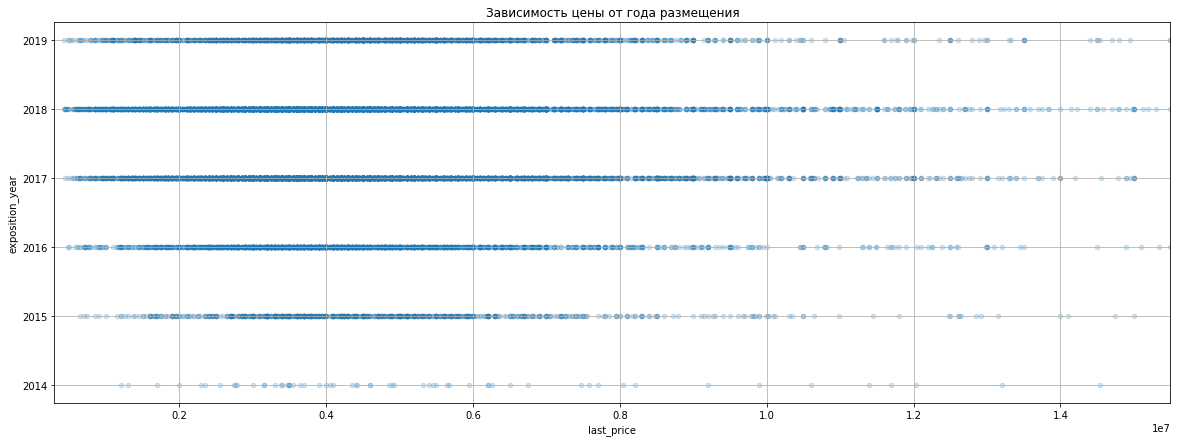

In [63]:
#Посмотрим на зависимость цены от года размещения
df.plot(
    x='last_price', y='exposition_year',
    title='Зависимость цены от года размещения',kind='scatter',
    style='*', alpha=.2, grid=True, figsize=(20,7), 
    xlim=(300000,15500000)
)
#Прослеживается следующая тенденция, начиная с 2014 года наблюдается рост стоимости квартир вплоть до 2018 года включительно,
#а в 2019 начинается снижение стоимости квартир

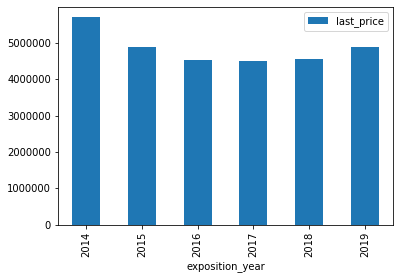

In [64]:
#Проверим вывод через сводную таблицу и другой график
exp_year_pivot=df.pivot_table(index='exposition_year', values='last_price', aggfunc='mean')
exp_year_pivot.plot(y='last_price', kind='bar')
#Вывод, основанный на предыдущем графике не подтвердился, в 2014 году квартиры выставлялись дороже и падали вплоть до 2017
#В 2018-2019г снова пошёл рост. С высокой вероятностью это связано с кризисом и обвалом рубля в конце 2014

#### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [65]:
#выведем топ 10 городов с наибольшим кол-вом объявлений
print(df['locality_name'].value_counts().head(10))
#создадим список и запишем туда эти 10 городов
top10_list=['Санкт-Петербург','посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'посёлок Парголово', 'Колпино', 'Пушкин', 'деревня Кудрово', 'Гатчина', 'Выборг'] 
#Теперь сделаем срез по списку
top10_ads=df.query('locality_name in @top10_list')
#Посмотрим уникальные значения
top10_ads.locality_name.unique()

Санкт-Петербург      11268
посёлок Мурино         485
посёлок Шушары         416
Всеволожск             349
посёлок Парголово      312
Колпино                284
Пушкин                 282
деревня Кудрово        269
Гатчина                267
Выборг                 189
Name: locality_name, dtype: int64


array(['посёлок Шушары', 'Санкт-Петербург', 'посёлок Парголово',
       'посёлок Мурино', 'Пушкин', 'деревня Кудрово', 'Гатчина', 'Выборг',
       'Колпино', 'Всеволожск'], dtype=object)

In [66]:
#Посчитаем среднюю цену квадратного метра для каждого нас. пункта
top_10_cities_cost = (top10_ads
        .pivot_table(index='locality_name', values='square_meter_price', aggfunc = 'mean')
        .sort_values(by = 'square_meter_price', ascending=False)
                     )

top_10_cities_cost=top_10_cities_cost.astype('int')
top_10_cities_cost.head(10)

,square_meter_price
locality_name,
Санкт-Петербург,106603
Пушкин,100170
деревня Кудрово,93275
посёлок Парголово,90949
посёлок Мурино,86129
посёлок Шушары,78913
Колпино,75864
Всеволожск,68727
Гатчина,68279


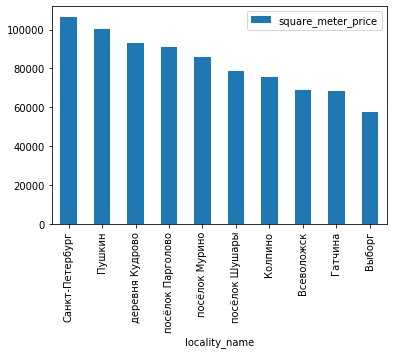

In [67]:
#Выведем график для большей наглядности
top_10_cities_cost.plot(y='square_meter_price', kind='bar')


In [68]:
#Самые низкие цены за кв. м. в Выборге, самые высокие в Санкт-Петербурге.

#### Изучите предложения квартир: 
* Для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [69]:
#Сделаем список с 1 значением нужного нам населённого пункта
SPB_list=['Санкт-Петербург']
#Теперь сделаем срез по списку
SPB_flats=df.query('locality_name in @SPB_list')
#Посмотрим уникальные значения
SPB_flats.locality_name.unique()

array(['Санкт-Петербург'], dtype=object)

In [70]:
#Округляем значения до целых километров
SPB_flats.loc[:,'cityCenters_nearest_km']=SPB_flats.loc[:,'cityCenters_nearest']/1000
#Меняем получившиеся цифры и float в int
SPB_flats.loc[:,'cityCenters_nearest_km']=SPB_flats.loc[:,'cityCenters_nearest_km'].astype('int')
SPB_flats['cityCenters_nearest_km'].value_counts()


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


14    1310
12    1281
13    1190
15    1183
11    1174
16     972
10     737
9      505
17     482
8      383
5      307
4      275
7      244
6      214
21     169
18     151
3      145
22     120
19      76
25      72
2       67
1       53
20      44
30      31
23      30
24      22
0       18
28       9
26       2
29       1
27       1
Name: cityCenters_nearest_km, dtype: int64

In [71]:
#Сделаем сводную таблицу и посчитаем среднюю цену для каждого километра
Center_km_mean=SPB_flats.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')


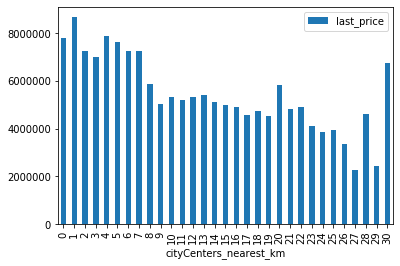

In [72]:
#Построим график для большей информативности
Center_km_mean.plot(y='last_price', kind='bar')

* На 7км от центра значения резко повысились. Зону от 0 до 7 километра можно считать центральной зоной.

<div class="alert alert-success">
    
Действительно, как видим на твоем графике, цена сильно начинает падать с увеличением расстояния от центра на 7 км и более.
</div>

#### Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: 
* площадь
* цена
* число комнат
* высота потолков

#### Также выделим факторы, которые влияют на стоимость квартиры 
* число комнат
* этаж
* удалённость от центра
* дата размещения объявления
#### Отличаются ли они от общих выводов по всему городу?

In [73]:
#Выделим квартиры в центральной зоне и оставим столбцы, которые нам нужны для дальнейшего исследования
SPB_flats_vip = SPB_flats.query('cityCenters_nearest_km <= 7 ')[['ceiling_height','total_area','last_price','rooms','floor_group','cityCenters_nearest_km','first_day_exposition','exposition_year', 'exposition_day', 'exposition_month'  ]]
SPB_flats_vip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 94 to 23691
Data columns (total 10 columns):
ceiling_height            1323 non-null float64
total_area                1323 non-null float64
last_price                1323 non-null int64
rooms                     1323 non-null int64
floor_group               1323 non-null object
cityCenters_nearest_km    1323 non-null int64
first_day_exposition      1323 non-null datetime64[ns]
exposition_year           1323 non-null int64
exposition_day            1323 non-null object
exposition_month          1323 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 113.7+ KB


AxesSubplot(0.125,0.125;0.775x0.755)
count    1323.000000
mean       58.633454
std        18.590699
min        12.000000
25%        43.800000
50%        57.000000
75%        72.000000
max       102.100000
Name: total_area, dtype: float64


count    11268.000000
mean        51.030205
std         16.296226
min         12.000000
25%         38.600000
50%         46.600000
75%         61.000000
max        102.100000
Name: total_area, dtype: float64

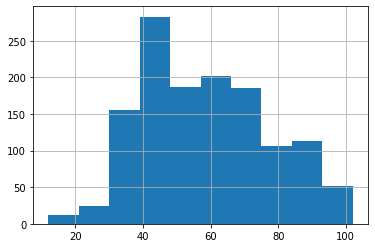

In [74]:
#Проанализируем следующие параметры: площадь, цена, число комнат, высота потолков 
print(SPB_flats_vip['total_area'].hist())
print(SPB_flats_vip['total_area'].describe())
SPB_flats['total_area'].describe()
#Больше всего квартир в центре имеют площадь от 40кв.м до ~46кв.м, при этом среднее значение по площади квартир в центре ~58м
#Квартиры в центре в среднем 7-8 кв.м больше

count    1.323000e+03
mean     7.509209e+06
std      3.544134e+06
min      1.686000e+06
25%      5.300000e+06
50%      6.750000e+06
75%      8.762507e+06
max      3.727200e+07
Name: last_price, dtype: float64
count    1.126800e+04
mean     5.420900e+06
std      2.330015e+06
min      1.190000e+06
25%      3.900000e+06
50%      4.800000e+06
75%      6.250000e+06
max      3.727200e+07
Name: last_price, dtype: float64


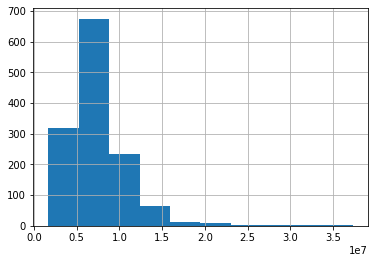

In [75]:
print(SPB_flats_vip['last_price'].describe())
print(SPB_flats['last_price'].describe())
SPB_flats_vip['last_price'].hist()
#Средняя стоимость квартир в центре - 7,5млн, это почти в 1,5 раза больше, чем в среднем по всему городу.

count    1323.000000
mean        1.984127
std         0.780175
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: rooms, dtype: float64
count    11268.000000
mean         1.818956
std          0.797766
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: rooms, dtype: float64


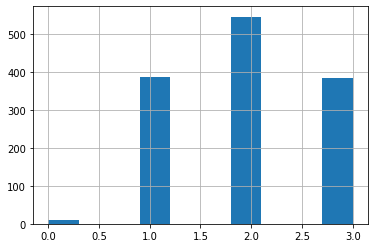

In [76]:
#Количество комнат
print(SPB_flats_vip['rooms'].describe())
print(SPB_flats['rooms'].describe())
SPB_flats_vip['rooms'].hist()
#Больше всего 2-х комнатных квартир, если рассматривать средние значения, то количество комнат в квартирах в центре меньше чем в общем по городу

count    1323.000000
mean        2.660083
std         0.074866
min         2.490000
25%         2.650000
50%         2.650000
75%         2.650000
max         2.850000
Name: ceiling_height, dtype: float64
count    11268.000000
mean         2.631058
std          0.083267
min          2.450000
25%          2.570000
50%          2.650000
75%          2.650000
max          2.850000
Name: ceiling_height, dtype: float64


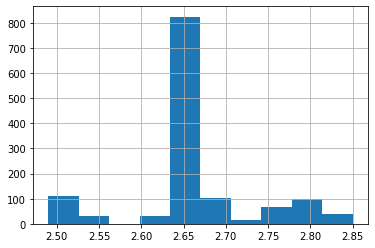

In [77]:
#Высота потолков
print(SPB_flats_vip['ceiling_height'].describe())
print(SPB_flats['ceiling_height'].describe())
SPB_flats_vip['ceiling_height'].hist()
#Среднее значение высоты потолков в центре на 3см выше, чем во всём городе. При этом самые низкие потолки в центре на 5 см выше.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd613fa8dd0>,
      dtype=object)

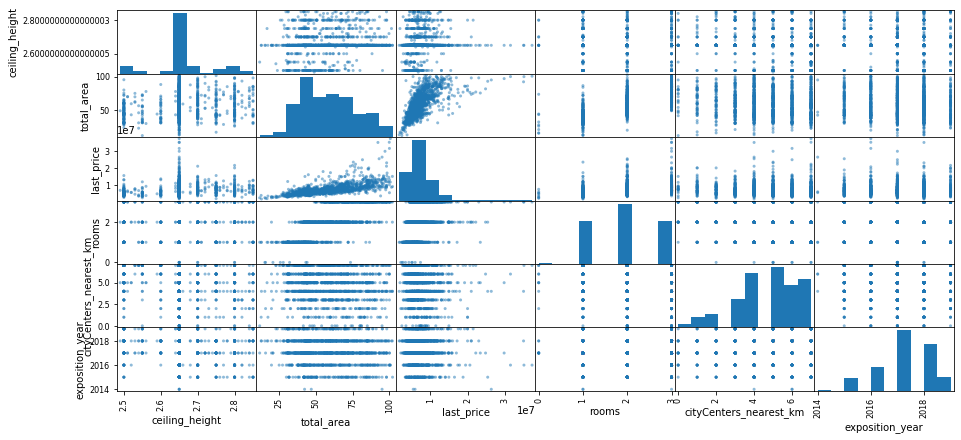

In [78]:
#Построим попарные диаграммы для числовых значений
pd.plotting.scatter_matrix(
    SPB_flats_vip
    ,alpha=0.5
    ,figsize=(15,7)
    ,grid = True
)


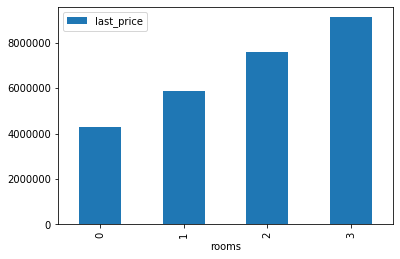

In [79]:
#Попробуем посмотреть через сводную таблицу и график на её основе
SPB_rooms_price=SPB_flats_vip.pivot_table(index='rooms', values='last_price', aggfunc='mean')
SPB_rooms_price.plot(y='last_price', kind='bar')
#Всё закономерно, чем больше комнат, тем выше цена

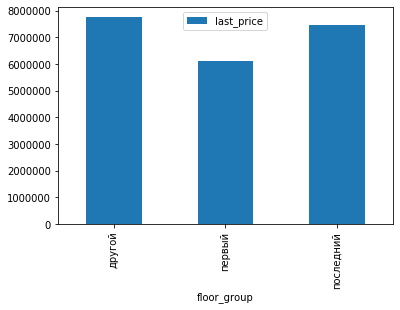

In [80]:
#Попробуем посмотреть через сводную таблицу и график на её основе
SPB_floor_price=SPB_flats_vip.pivot_table(index='floor_group', values='last_price', aggfunc='mean')
SPB_floor_price.plot(y='last_price', kind='bar')
#Зависимость цены от этажности квартир в центре совпадает с выводами по всем квартирам, первый этаж - самый дешёвый

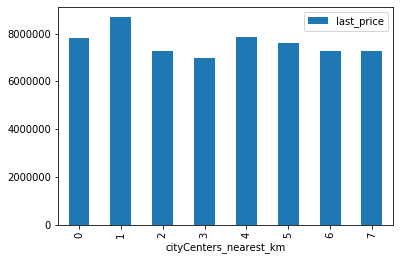

In [81]:
#Попробуем посмотреть через сводную таблицу, и посчитать среднюю цену для каждого км и сравнить их
SPB_center_price=SPB_flats_vip.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
SPB_center_price.plot(y='last_price', kind='bar')
#Очень большой разницы в стоимости квартир в центре нет, только квартиры в радиусе 1км чуть выше остальных

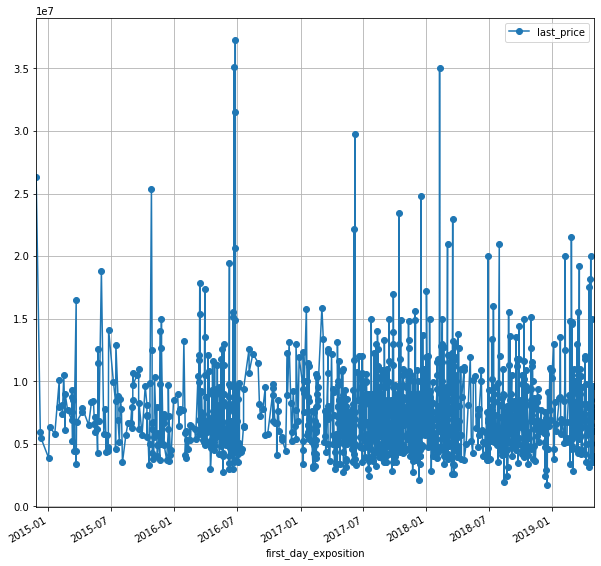

In [82]:
#Попробуем вывести график с зависимостью цены от даты публикации
SPB_flats_vip.plot(x='first_day_exposition', y='last_price', style='-o', figsize=(10,10), grid=True)
#Не очень информативно

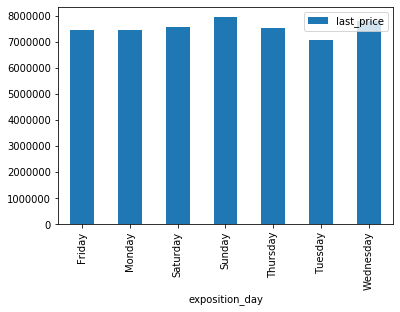

In [83]:
#Посмотрим зависимость от дня недели
SPB_date_vip_price_day=SPB_flats_vip.pivot_table(index='exposition_day', values='last_price', aggfunc='mean')
SPB_date_vip_price_day.plot(y='last_price', kind='bar')
#Самые дорогие квартиры размещаются в воскресенье и среду

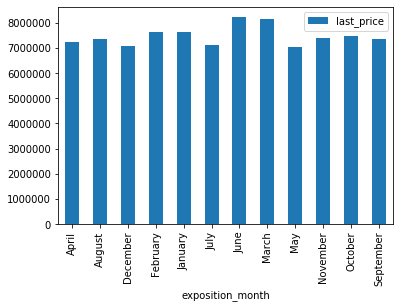

In [84]:
#Посмотрим зависимость от месяца
SPB_date_vip_price_month=SPB_flats_vip.pivot_table(index='exposition_month', values='last_price', aggfunc='mean')
SPB_date_vip_price_month.plot(y='last_price', kind='bar')
#Самая высокая средняя стоимость размещённых квартир в марте и июне.

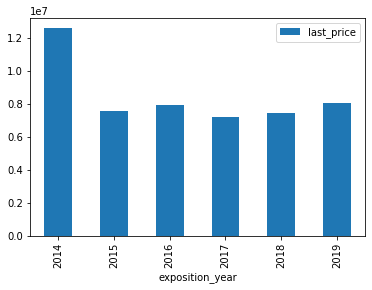

In [85]:
#Посмотрим зависимость от года
SPB_date_vip_price_year=SPB_flats_vip.pivot_table(index='exposition_year', values='last_price', aggfunc='mean')
SPB_date_vip_price_year.plot(y='last_price', kind='bar')
#Лидирует как и прежде 2014 год

#### Если сравнивать квартиры по Санкт-Петербургу в целом и его центральной части, можно отметить следующее:
* Квартиры в центре в среднем 7-8 кв.м больше, чем в среднем по всему городу
* Средняя стоимость квартир в центре почти в 1,5 раза больше, чем в среднем по всему городу
* Количество комнат в квартирах в центре меньше чем в общем по городу
* Среднее значение высоты потолков в центре на 3см выше, чем во всём городе
* В зависимости стоимости квартиры от количества комнат - особой разницы не обнаружено, чем больше комнат, тем выше стоимость.
* Зависимость от этажа, на котором размещена квартира также похожа. Самые дешёвые квартиры - на первом этаже.
* Зависимость цены от расстояния до центра в центральной зоне не особо заметно, в то время как в остальном городе, чем ближе, тем дороже.
* Если брать средние значения, то самые дорогие квартиры размещают по средам и воскресеньям, в марте и июне. И желательно в 2014 году)



<div class="alert alert-success">

**Вывод** обоснован и структурировано изложен, легко воспринимается.
</div>


### Шаг 5. Общий вывод

#### В ходе обработки и исследования данных о размещённых квартирах, мы выявили следущее:
* Чем ближе квартира к центру, тем она дороже
* Чем больше комнат в квартире, тем она дороже
* Чем больше площадь квартиры, тем она дороже
* Средняя площадь квартиры во всех населённых пунктах порядка 50м
* Средняя высота потолков - около 2,65м
* Самая дешёвая средняя стоимость квадратного метра - в Выборге, а самая дорогая - в Санкт-Петербурге
* Цетральная зона Санкт-Петербурга начинается с удалённости в 7км, квартиры там в среднем в полтора раза дороже.
* Самые дешёвые квартиры распологаются на первом этаже
* В конце 2014 средняя стоимость квартир была значительно выше, чем в последующие года, это может быть связано с обвалом рубля и повышенном спросе на квартиры в тот период
* Зависимость от дня недели и месяца размещения объявления не прослеживается, есть только отклонения в центре города, там в марте и июне, в среду и воскресенье, средняя стоимость размещаемых квартир выше.
* Рынок недвижимости в СПБ падал начиная с 2014 года и начал восстанавливаться ближе к 2018-19 годам.

<div class="alert alert-success">

## Комментарий наставника

***Алексей***, ты проделал большую работу, молодец! 
    
Отдельное спасибо тебе за форматирование и структурированность выводов. На них даже просто смотреть приятно :) 
    
Проект принимаю.
</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыты файлы
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  
- [x]  
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод